### Regional Average Tutorial

##### For this tutorial we will be using CMIP6 data to construct an regional average plot of the air surface temperature over time in New York City

#### __Step 1. Install and Import Packages__

##### Let's start in the __terminal__ and install "__cfTime__" which allows us to read our NetCDF files more efficiently

__conda install cftime__

##### Next install these packages in your __terminal__ if not already installed

__conda install xarray__

__conda install matplotlib__ 

__conda install numpy__

Great! The needed packages for our time series graph are installed in the terminal, lets quickly import them into our jupiter python notebook¶

In [46]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

##### What are we installing and importing exactly?
- ##### `xarray` can read and write NetCDF files
- ##### `matplotlib` is a plotting library that will be used to plot maps and geospatial data
- ##### `numpy` is used for working with arrays and will help us create our line of best fit

#### __Step 2. Find path to your NetCDF file__
- ##### The download of a NetCDF file off the ESGF website was shown previously in tutorial previously shown
- ##### We’ll use the `xr.open_dataset()` function from xarray to open the NetCDF file.
- ##### This function reads the file and loads it into an xarray.Dataset object and allows for easy manipulation and analysis of the data.

In [47]:
data = xr.open_dataset('/Users/fletcherhoz/Downloads/tas_Amon_BCC-CSM2-MR_esm-hist_r1i1p1f1_gn_185001-201412.nc')

#### _HINT- if you ever need to find a file path name grab the downloaded file off of your finder and drag it into your terminal_
- ##### The terminal will spit out the name of where to find the file
- ##### Copy and paste that name in xr.open_dataset to open the file !!

#### __Step 3. Print our NetCDF file__
- ##### Use the `print()` function
- ##### file is labeled "data"

In [48]:
print(data)

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 160, lon: 320)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon        (lon) float64 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          Standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  2145.0
    comment:                The model integration starts from the esm-piContr...
    ...                     ...
    title:                  BCC-CSM2-MR output prepared for CMIP6
    tracking_id:            hdl:21.14100/fe00d2c1-0808-428e-84

##### __We print the dataset because it...__
- ##### Provides a clear picture of what the data looks like and what we have to work with
- ##### Allows us to verify that the necessary variables (e.g., `tas` for air surface temperature) are present in the dataset
- ##### Checks if the dataset covers the required time range and geographical region

##### For creating a regional average plot, we need to know the dimensions and the coordinates associated with these dimensions. 
##### __Let's detail exactly what is in our data...__

##### __Dimensions:__
- ##### __lat: 160__ This indicates there are 160 latitude points.
- ##### __lon: 320__ This signifies there are 320 longitude points.
- ##### __time: 1980__ This represents 1980 time steps.
- ##### __bnds: 2__ This is an additional dimension used for bounds.

##### __Coordinates:__
- ##### __Latitude (lat):__ Values range from approximately -89.73° to 89.73°, covering almost the entire latitude span of the Earth.
- ##### __Longitude (lon):__ Values range from 0.0° to 359.6°, nearly covering the entire globe.
- ##### __Time (time):__ Time points are spaced one day apart, centered at noon, for January 1950.

##### _These coordinates cover the entire planet. That is common for CMIP6 files, so you can choose any location desired._

##### __Data Variables:__
- ##### __time_bnds:__ Shows when each time point starts and ends. This helps to understand the time periods covered.
- ##### __tas:__ Stores temperature values for each combination of time, latitude, and longitude.

##### There is more information provided; however, it is not necessary for our Regioal Average Plot.


#### __Step 4: Isolate the desired time__ 
##### The dataset might cover a broad time range however for this example we want to focus on a specific period, from 1910 to 2010.

In [49]:
data = data.sel(time=slice('1910-01-01','2010-12-31'))

- ##### The `sel()` function is used to select data along one or more dimensions—in this case, the time dimension.
- ##### By passing the `slice()` function with specific start and end dates, from'1910-01-01' and '2010-12-31', the dataset is filtered to only include data within Jan 1st 1910 to December 31st 2010

#### __Step 5: Choose the 'tas' variable from our data__
- ##### In climate data analysis, you often work with specific variables. Here, 'tas' represents the surface air temperature, which is the variable we want to analyze.
- #####  By using `data('tas')`, we extract the variable named 'tas'.

In [50]:
tas = data['tas']

#### __Step 6: Now lets break this down to a specfic region. Lets choose New York City!__
##### A) Define the latitude and longitude bounds for New York City¶
- ##### This code snippet is setting up two pairs of variables, `lat_min` and `lat_max` for latitude, and `lon_min` and `lon_max` for longitude.
- ##### These variables are used to define a specific geographic region of interest within a broader dataset
- ##### You can use a map or a globe to determine the approximate latitude and longitude boundaries of the region you're interested in.
- ##### For instance:
    - ##### The latitude range of 40.5°N to 41.0°N is a small range over New York City
    - ##### The longitude range of 285.5° to 286.5° covers the area around New York City

In [51]:
lat_min, lat_max = 40.5, 41
lon_min, lon_max = 286, 287

##### B) Subset the Data for New York City
- ##### The code defines latitude and longitude masks for New York City using the `tas` dataset.
- ##### The masks (`tas_NYC_lat` and `tas_NYC_lon`) filter the dataset to include only the grid cells within the specified latitude (`lat_min` to `lat_max`) and longitude (`lon_min` to `lon_max`) boundaries.
- ##### Finally, the `tas.where()` function is used to subset the data to the specified region, dropping any data points outside the specified latitude and longitude range.

In [52]:
tas_NYC_lat = (tas.lat >= lat_min) & (tas.lat <= lat_max)
tas_NYC_lon = (tas.lon >= lon_min) & (tas.lon <= lon_max)
tas_NYC = tas.where(tas_NYC_lat & tas_NYC_lon, drop=True)

#### __Step 7: Take the spatial average over the selected region__
##### Contains the average temperature for NYC over time, with the latitude and longitude dimensions removed.
##### __Make sure to do this step before computing the annual mean temperature__ (step 8)

In [53]:
tas_NYC = tas_NYC.mean(dim=['lat','lon'])

- ##### `tas_NYC` filtered temperature data for New York City.
- ##### `.mean(dim=['lat', 'lon'])`Averages the temperature data over all the latitude and longitude points in the NYC region that was set in the pervious step
- ##### The result is a single average temperature value for each time step, rather than multiple values for different locations.
- ##### __Without first averaging the temperature data over the region, the regional average will be miscomputed__
- ##### Because the input values for the regional average should represent a single average point for the entire region, rather than multiple values from various locations. 

#### __Step 8: Calculate the Annual Mean Temperature__
- ##### Here we want to now calculate the average annual temperature for New York City:
- `tas_NYC` is the temperature data averaged over latitude and longitude.
- ##### `.groupby('time.year')` Groups the data by each year.
- ##### `.mean()` Computes the mean temperature for each year.
- ##### The `annual_mean` variable now holds the average global temperature for each year, which can be used to observe long-term trends.

In [54]:
annual_mean = tas_NYC.groupby('time.year').mean()

#### __Step 9: Convert Temperatures to Celsius__
- ##### Temperature data in climate studies is often stored in Kelvin, but Celsius is more commonly used and easier to interpret for most people.
- ##### Converting the data to Celsius makes it more accessible.
- ##### To convert from Kelvin to Celsius, subtract 273.15 from the temperature values. This conversion is applied to the annual mean 

In [55]:
annual_mean = annual_mean - 273.15

#### __Step 10: Calculate Line of Best Fit / Trend Line__
- ##### A line of best fit is used to show the relationship between data points, and to predict future data based on the line's slope
- ##### This will show the overall trend of our air surface temperature graph and see whether the temp increases or decreases overtime
- ##### `np.polyfit`is a function in NumPy is used to fit a polynomial of a specified degree to a set of data points.
  - ##### It uses the least squares method to find the best-fitting line for the `annual_mean.year` x-axis and `annual_mean` temperature y-axis
  - ##### The `1` says we want to fit a straight line. A higher number would indicate fitting a curve.
  - ##### This calculates our best-fit trendline for our air surface temperature data
- ##### `trend_line` output uses the function `np.poly1d` phyiscally creates the polynomial so the trend line can be plotted

In [56]:
x = np.polyfit(annual_mean.year, annual_mean, 1)
trend_line = np.poly1d(x)  

#### __Step 11: Now Let's Plot!__
- ##### We plot the regional average surface air temperature for New York City from 1910 to 2010 to see how temperatures have changed over time

#### A) Set Up the Plot:
- ##### Start by creating a figure and axis using `plt.subplots()`.
- ##### This function creates a figure (`fig`) and a set of subplots (`ax`).
- ##### The figure is the overall window or page that contains the plot, while the axes are the actual plotting areas where the data will be visualized.
- ##### `figsize=(14, 7)` specifies the size of the figure in inches, setting up the space where your data will be plotted.

#### B) Plot Annual Temperatures:
- ##### The following code creates a line graph showing how the regional average surface air temperature for NYC changes year by year from 1910 to 2010.
- ##### `ax.plot()`: This function plots the data on the specified axes, creating a line graph by connecting data points with straight lines.
- ##### `annual_mean.year`: This represents the data for the x-axis, showing the years from 1910 to 2010. The year is extracted automatically from the time dimension of the `tas` dataset.
- ##### `annual_mean`: This represents the data for the y-axis, showing the average surface air temperature in Celsius for each year for the NYC region.
- ##### `label='Annual Avg Temperature (NYC)'`: The label argument is used for the legend, identifying what this line represents.
- ##### `color='blue'`: This sets the color of the line to blue, a common choice for temperature data in visualizations.
#### C) Plot Line of Best Fit / Trend Line:
- ##### The following code creates a line of best fit to show the overall trend of the temperature data
- ##### This also uses the function `ax.plot()` and x-axis data `annual_mean.year` to create a line graph with year data as its x-axis
- ##### `trend_line`is the correspondance to evaluates each year, the function p calculates the corresponding y-value (temperature) of the line of best fit.
- ##### The output of `trend_line(annual_mean.year)`is an array of temperature values corresponding to the years, which makes up the y-values for the line of best fit.
- ##### `color='red'`This sets the line color to red.
- ##### `linestyle='--'`: This makes the line dashed, which is commonly used for trend lines.
- ##### `label=f'Trend Line(Slope = {x[0]:.4f}°C/year)'`Adds a label to the legend, showing the line of best fit with the slope value rounded to 4 decimal places.
#### D) Add Labels, Title, and Legend:
- ##### Use `ax.set_title()`, `ax.set_xlabel()`, and `ax.set_ylabel()` to add a title and labels to your plot, making it more informative.
- ##### Finally, `ax.legend()` adds a legend to differentiate between the plotted lines.

#### E) Show the Plot!
- ##### The last step! `plt.show()` renders the plot, opening a window (or displaying inline, depending on your environment) to show the final visualization.


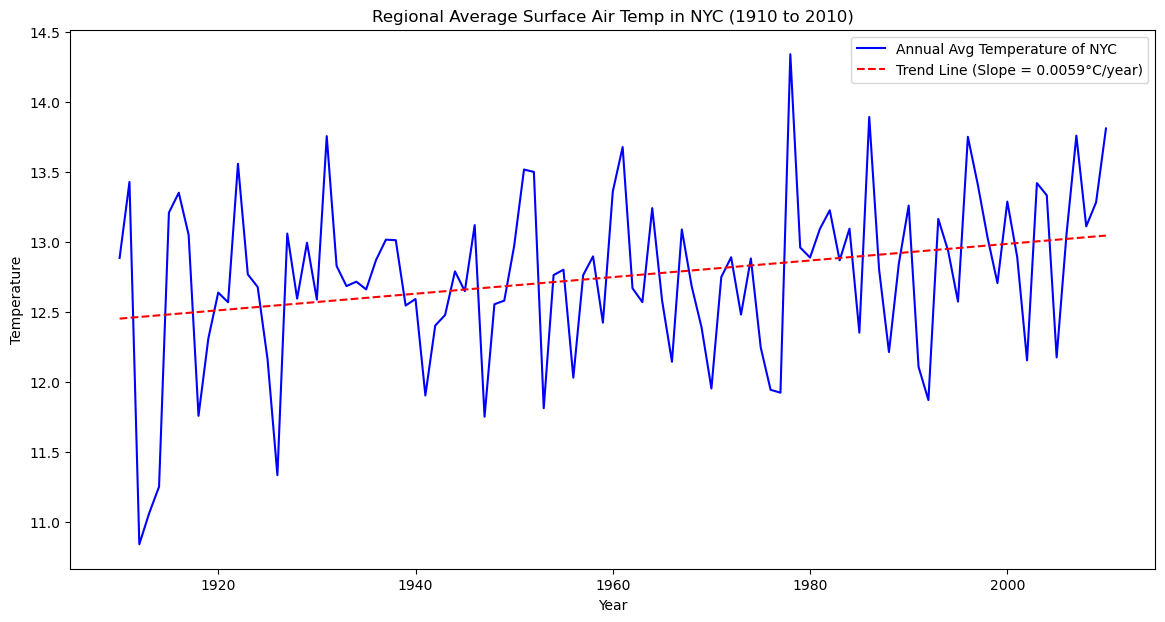

In [57]:
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(annual_mean.year, annual_mean, label= 'Annual Avg Temperature of NYC', color='blue')
ax.plot(annual_mean.year, trend_line(annual_mean.year), color='red', linestyle='--', label=f'Trend Line (Slope = {x[0]:.4f}°C/year)')
ax.set_title('Regional Average Surface Air Temp in NYC (1910 to 2010)')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.legend()
plt.show()

#### __NOTE__: Do not use this data for publication yet because grid cells are not weighted by area, which could lead to misleading regional averages.
##### We will dive deeper in later tutorials on how to weigh the grid cells by area. Right now we are focusing on the basics. However it is important to do so because it willa allow our plot to have...
- ##### Accurate Averages: Weighting grid cells by their area ensures that regional average climate plots accurately reflect the true climate of the region.

- ##### True Representation: Each grid cell’s area impacts regional climate averages. Without weighting, your plots might misrepresent the climate conditions.

- ##### Avoid Misleading Data: It can lead to inaccurate regional averages. Proper weighting ensures your climate data is represented correctly.